In [1]:
# libraries import
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.stem.porter import *

In [2]:
# download lemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/himanshus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [4]:
# Load data from csv
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [5]:
# inspecting non-sexist/racist tweets
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [6]:
# inspecting sexist/racist tweets
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [37]:
# Count number of tweets in training and test datasets
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [8]:
# Count number of tweets for sexist and non-sexist comment
# sexist/racist comment are labelled by 1
# non-sexist/non-racist comment are labelled by 0

train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

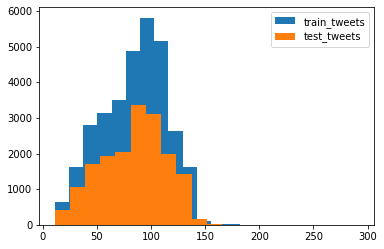

In [9]:
# Length of the tweets, in terms of words, in both train and test data.
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [10]:
# Combine test and train dataframe for tweets cleanup
total_tweets = train.append(test, ignore_index=True, sort='False') 
total_tweets.shape

(49159, 3)

In [11]:
# Function to remove unwanted text patterns from the tweets such as twitter_handles, punctuation and special characters and others
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [12]:
# Tweets cleanup and wranggling
# 1.Removing twitter handles from tweets
total_tweets['tidy_tweet'] = np.vectorize(remove_pattern)(total_tweets['tweet'], "@[\w]*") 
total_tweets.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
# 2.Removing punctuations, special characters and numbers
total_tweets['tidy_tweet'] = total_tweets['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
total_tweets.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [14]:
# 3. Removing short words less than length 3 since they are meaningless in the context
total_tweets['tidy_tweet'] = total_tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
total_tweets.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional and selfish drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit can use cause they don offer wheelchair vans pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with all the time
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year the year for exams can think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here #gr


In [15]:
# Text Normalization -reducing terms to their base word(like runs, run, running, ran to base word run)
tweet_tokens = total_tweets['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tweet_tokens.head()


0                          [when, father, dysfunctional, and, selfish, drags, his, kids, into, his, dysfunction, #run]
1    [thanks, for, #lyft, credit, can, use, cause, they, don, offer, wheelchair, vans, pdx, #disapointed, #getthanked]
2                                                                                              [bihday, your, majesty]
3                                                                           [#model, love, take, with, all, the, time]
4                                                                              [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

In [16]:
# using nltk’s PorterStemmer() function to normalize the tweets
stemmer = PorterStemmer() 
tweet_tokens = tweet_tokens.apply(lambda x: [stemmer.stem(i) for i in x])
# TODO with different lemmatizer like spacy, wordnetlemmatizer

# using WordNetLemmatizer
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# tweet_tokens = tweet_tokens.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

for i in range(len(tweet_tokens)):
    tweet_tokens[i] = ' '.join(tweet_tokens[i])    
total_tweets['tidy_tweet'] = tweet_tokens

In [17]:
tweet_tokens.head()

0                            when father dysfunct and selfish drag hi kid into hi dysfunct #run
1    thank for #lyft credit can use caus they don offer wheelchair van pdx #disapoint #getthank
2                                                                           bihday your majesti
3                                                            #model love take with all the time
4                                                                  factsguid societi now #motiv
Name: tidy_tweet, dtype: object

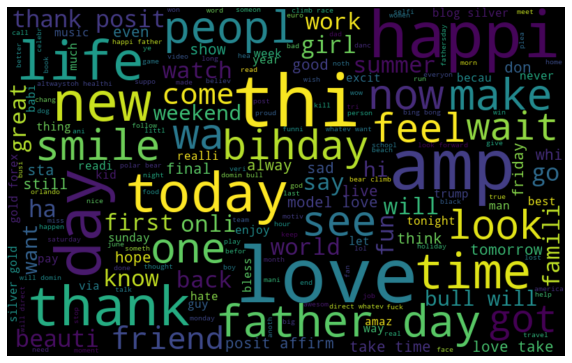

In [22]:
# find common words used in the tweets
from wordcloud import WordCloud
all_words = ' '.join([text for text in total_tweets['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

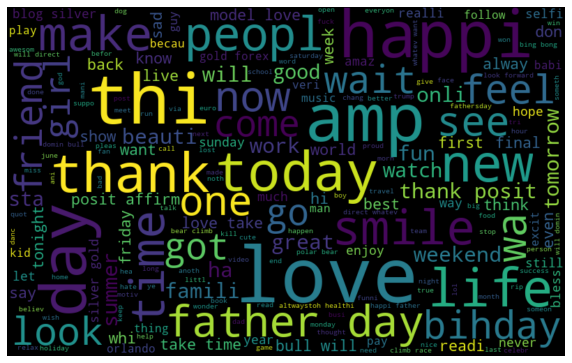

In [26]:
# get common word in non-sexist tweets
normal_words =' '.join([text for text in total_tweets['tidy_tweet'][total_tweets['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

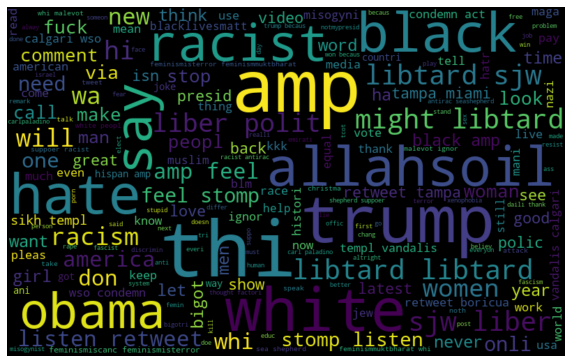

In [27]:
# get common word in sexist & racist tweets
negative_words = ' '.join([text for text in total_tweets['tidy_tweet'][total_tweets['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [32]:
# extracting hashtags from non racist/sexist tweets
hashtag_regular = hashtag_extract(total_tweets['tidy_tweet'][total_tweets['label'] == 0])
hashtag_regular = sum(hashtag_regular,[]) # unnesting list
# extracting hashtags from racist/sexist tweets
hashtag_negative = hashtag_extract(total_tweets['tidy_tweet'][total_tweets['label'] == 1])
hashtag_negative = sum(hashtag_negative,[]) # unnesting list

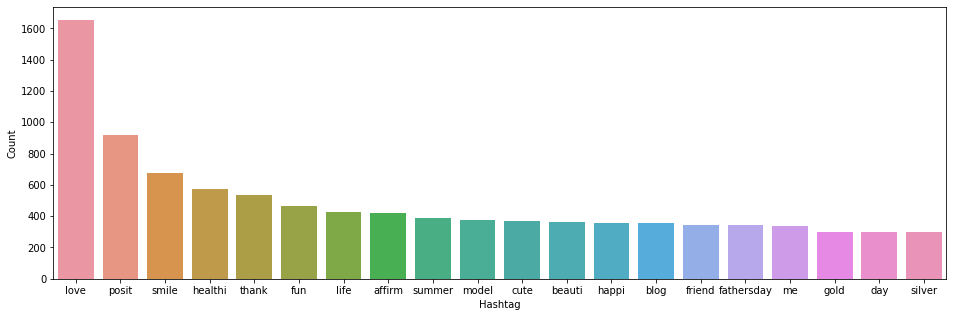

In [41]:
# plot hashtags in the non-racist/sexist tweets
a = nltk.FreqDist(hashtag_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()            

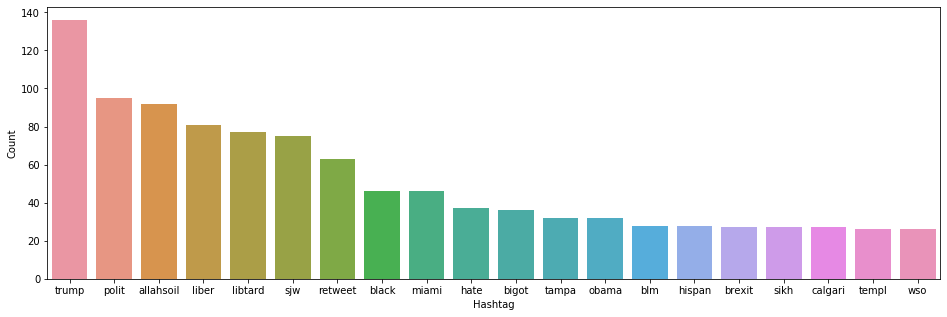

In [42]:
 # plot hashtags in the racist/sexist tweets
b = nltk.FreqDist(hashtag_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [52]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
# Bag-of-Words Features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(total_tweets['tidy_tweet'])
bow.shape

(49159, 1000)

In [51]:
# TF IDF Features
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(total_tweets['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [57]:
# word2vec Feature
# Train a Word2Vec model on our corpus
tokenized_tweet = total_tweets['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 
model_w2v.train(tokenized_tweet, total_examples= len(total_tweets['tidy_tweet']), epochs=20)

(7942505, 9627200)

In [58]:

# function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape 

(49159, 200)

In [62]:
### Logistic Regression on 
# 1.Bag-of-Words Features

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Extracting train and test BoW features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
logisticRegression=LogisticRegression()
# training the model
logisticRegression.fit(xtrain_bow, ytrain)
prediction = logisticRegression.predict_proba(xvalid_bow) # predicting on the validation set 

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5564648117839608

In [64]:
# 2.Tf-Idf Features
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]
# training the model
logisticRegression.fit(xtrain_tfidf, ytrain) 
prediction = logisticRegression.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5456110154905336

In [66]:
# 3 Word2Vec Features
# Extracting train and test Word2Vec features
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
# training the model
logisticRegression.fit(xtrain_w2v, ytrain) 
prediction = logisticRegression.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.6209439528023599

In [68]:
### Support Vector Machine(SVM) on
from sklearn import svm

# 1.Bag-of-Words Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)



0.5297777777777778

In [70]:
# 2.Tf-Idf Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5314437555358724

In [71]:
# 3 Word2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)
prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6241352805534205

In [72]:
### Random Forest on
from sklearn.ensemble import RandomForestClassifier

# 1.Bag-of-Words Features
randomForestClassifier = RandomForestClassifier(n_estimators=400, random_state=11)
randomForestClassifier.fit(xtrain_bow, ytrain)
prediction = randomForestClassifier.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5407523510971787

In [73]:
# 2.Tf-Idf Features
randomForestClassifier = RandomForestClassifier(n_estimators=400, random_state=11)
randomForestClassifier.fit(xtrain_tfidf, ytrain)
prediction = randomForestClassifier.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5895316804407713

In [74]:
# 3 Word2Vec Features
randomForestClassifier = RandomForestClassifier(n_estimators=400, random_state=11)
randomForestClassifier.fit(xtrain_w2v, ytrain)
prediction = randomForestClassifier.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.47483588621444206

In [75]:
### Extreme Gradient Boosting (xgboost) on
from xgboost import XGBClassifier

# 1.Bag-of-Words Features
xgbModel = XGBClassifier(max_depth=6, n_estimators=1000)
xgbModel.fit(xtrain_bow, ytrain)
prediction = xgbModel.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5196548418024928

In [76]:
# 2.Tf-Idf Features
xgbModel = XGBClassifier(max_depth=6, n_estimators=1000)
xgbModel.fit(xtrain_tfidf, ytrain)
prediction = xgbModel.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5498602050326188

In [77]:
# 3 Word2Vec Features
xgbModel = XGBClassifier(max_depth=6, n_estimators=1000)
xgbModel.fit(xtrain_w2v, ytrain)
prediction = xgbModel.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6384544618215271